In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
"""Tensorflow-Keras Implementation of Mish"""

## Import Necessary Modules
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

get_custom_objects().update({'Mish': Mish(mish)})

In [7]:
model = tf.keras.models.load_model('weights/hotdog_classifier.h5', compile=False, custom_objects={'mish': tf.keras.layers.Activation('Mish')})

In [8]:
img = cv2.imread('data/test/hot_dog/133012.jpg')
img_copy = img.copy()
img_copy = cv2.resize(img_copy, (128, 128))
img_copy = img_copy / 255.
img_copy = np.expand_dims(img_copy, axis=0)

In [12]:
prediction = model.predict(img_copy)

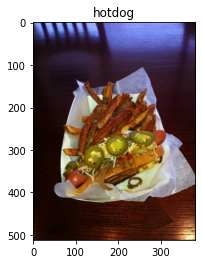

In [18]:
selected_pred = np.argmax(prediction)
labels = {0: 'not_hotdog', 1: 'hotdog'}
plt.title(labels[selected_pred])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))